In [1]:
import sys
sys.path.append("../script/")

import Functions
from Engine import Engine
from GTGP import GTGP


from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score,f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import importlib
from time import time
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import numpy as np
import pandas as pd
from time import time

In [2]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils import shuffle
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print(roc_auc_score(true_y,y_prob))

# data

In [3]:
def to_one_hot(y,yt):
    le = LabelEncoder()
    ohe = OneHotEncoder()
    y_train = le.fit_transform(y)
    y_one_hot = ohe.fit_transform(y_train.reshape(-1,1))
    
    y_test = le.transform(yt)
    yt_one_hot = ohe.transform(y_test.reshape(-1,1))
    
    return y_train,y_test,y_one_hot,yt_one_hot

def initial(y_one_hot):
    init_log_odds = np.sum(y_one_hot,axis=0)/y_one_hot.shape[0]
    
    init_p = np.exp(init_log_odds)
    init_p = init_p/(1+init_p)

    return init_log_odds,init_p


In [4]:
X_train = pd.read_csv("../data/gisette_train.data",delimiter=" ",header=None).iloc[:,:-1].values
y_train = pd.read_csv("../data/gisette_train.labels",delimiter=" ",header=None).values.flatten()
y_train[y_train==-1] = 0

X_test = pd.read_csv("../data/gisette_valid.data",delimiter=" ",header=None).iloc[:,:-1].values
y_test = pd.read_csv("../data/gisette_valid.labels",delimiter=" ",header=None).values.flatten()
y_test[y_test==-1] = 0

# X_train, X_test_addition, y_train, y_test_addition = train_test_split(X_train, y_train, train_size=1000,stratify=y_train)
# X_train, X_test_addition, y_train, y_test_addition = train_test_split(X_train, y_train, train_size=20,stratify=y_train)

# X_test = np.concatenate([X_test,X_test_addition])
# y_test = np.concatenate([y_test,y_test_addition])

seeds = [10086, 200,500,30506,30405,30420,10056,7059,40965,5398,869543,83491,823190,
         48392,2810,48392,3498210,483902,859032,12890,538920,86954,54309,6504,9840,
         219805,548,2981,432890,5438908,219094,5843902,60854,979,12890,2108,4093]
X = np.concatenate([X_train,X_test])
y = np.concatenate([y_train,y_test])
train_size = 0.7

dataset = 'gisette'

y_train,y_test,y_train_one_hot,y_test_one_hot = to_one_hot(y_train,y_test)

# model

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size,stratify=y, random_state=seeds[0])
y_train,y_test,y_train_one_hot,y_test_one_hot = to_one_hot(y_train,y_test)

In [19]:
learning_rate=0.1
max_depth=1
bins=8
lam=1

gtgp = GTGP(learning_rate=learning_rate,max_depth=max_depth,bins=bins,lam=lam)

total_size=10
elite_size = 10
epoch= 3000
gp_epoch=1
verbose = 1
tolerance=0.0001

gtgp.fit(X_train,y_train,total_size=total_size,elite_size = elite_size,epoch=epoch,gp_epoch=gp_epoch,tolerance=tolerance,verbose=verbose)


9 27 1
17 51 2
25 75 3
32 96 4
38 114 5
46 138 6
50 150 7
53 159 8
57 171 9
62 186 10
66 198 11
71 213 12
76 228 13
80 240 14
84 252 15
87 261 16
91 273 17
95 285 18
101 303 19
107 321 20
114 342 21
118 354 22
119 357 23
123 369 24
129 387 25
134 402 26
139 417 27
145 435 28
149 447 29
151 453 30
156 468 31
164 492 32
167 501 33
168 504 34
174 522 35
182 546 36
185 555 37
190 570 38
193 579 39
195 585 40
198 594 41
201 603 42
204 612 43
206 618 44
211 633 45
216 648 46
221 663 47
223 669 48
228 684 49
233 699 50
234 702 51
235 705 52
237 711 53
237 711 54
241 723 55
243 729 56
246 738 57
253 759 58
259 777 59
262 786 60
266 798 61
268 804 62
270 810 63
272 816 64
276 828 65
280 840 66
284 852 67
286 858 68
288 864 69
292 876 70
295 885 71
296 888 72
298 894 73
300 900 74
302 906 75
305 915 76
307 921 77
309 927 78
314 942 79
318 954 80
320 960 81
323 969 82
329 987 83
331 993 84
333 999 85
336 1008 86
344 1032 87
347 1041 88
352 1056 89
355 1065 90
360 1080 91
364 1092 92
366 1098 93
3

In [21]:
retrain_epoch=100
alpha=1
beta=1
gammer=1

verbose=1
gtgp.lam = 100
gtgp.retrain_estimators_roc(X_test,y_test,retrain_epoch=retrain_epoch,alpha=alpha,beta=beta,gammer=gammer,verbose=verbose)

retrain  1 :
	train: 0.9669387755102041 0.9941859225322782 	test: 0.9628571428571429 0.993447619047619
retrain  2 :
	train: 0.9787755102040816 0.9966442315701791 	test: 0.9704761904761905 0.9954331065759637
retrain  3 :
	train: 0.9822448979591837 0.9977491045397751 	test: 0.9733333333333334 0.9962367346938774
retrain  4 :
	train: 0.9851020408163266 0.9984154935443565 	test: 0.9738095238095238 0.9966249433106575
retrain  5 :
	train: 0.9873469387755102 0.9988603082049146 	test: 0.9747619047619047 0.9968526077097506
retrain  6 :
	train: 0.9893877551020408 0.999163348604748 	test: 0.9752380952380952 0.9969687074829932
retrain  7 :
	train: 0.9924489795918368 0.9993972511453562 	test: 0.9752380952380952 0.997037641723356
retrain  8 :
	train: 0.993265306122449 0.9995563515202 	test: 0.9757142857142858 0.9970675736961451
retrain  9 :
	train: 0.9942857142857143 0.9996746355685131 	test: 0.9757142857142858 0.9970938775510205
retrain  10 :
	train: 0.9953061224489796 0.9997582673885881 	test: 0.97

In [14]:
def fit_trees():
    learning_rate=0.1
    max_depth=2
    bins=8
    lam=1

    gtgp = GTGP(learning_rate=learning_rate,max_depth=max_depth,bins=bins,lam=lam)

    total_size=10
    elite_size = 10
    epoch= 1000
    gp_epoch=1
    verbose = 1
    tolerance=0.001

    gtgp.fit(X_train,y_train,total_size=total_size,elite_size = elite_size,epoch=epoch,gp_epoch=gp_epoch,tolerance=tolerance,verbose=verbose)

    retrain_epoch=1
    alpha=1
    beta=1
    gammer=1

    verbose=1
    gtgp.lam = 10
    gtgp.retrain_estimators_roc(X_test,y_test,retrain_epoch=retrain_epoch,alpha=alpha,beta=beta,gammer=gammer,verbose=verbose)

    return gtgp

for i in range(1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size,stratify=y, random_state=seeds[i])
    y_train,y_test,y_train_one_hot,y_test_one_hot = to_one_hot(y_train,y_test)
    gtgp = fit_trees()

    print(classification_report(y_train,np.argmax(gtgp.train_p,axis=1),digits=5))
    print(classification_report(y_test,np.argmax(gtgp.test_p,axis=1),digits=5))

    num_trees,depth,num_nodes = gtgp.print_model()

    train_acc = accuracy_score(y_train,np.argmax(gtgp.train_p,axis=1))
    test_acc = accuracy_score(y_test,np.argmax(gtgp.test_p,axis=1))
    train_roc = roc_auc_score(gtgp.y_one_hot.toarray(),(gtgp.train_p.T/np.sum(gtgp.train_p,axis=1)).T)
    test_roc = roc_auc_score(y_test_one_hot.toarray(),(gtgp.test_p.T/np.sum(gtgp.test_p,axis=1)).T)


    # with open('./benchmark/'+dataset+'.csv','a') as f:
    #     s = str(train_acc)+","+str(test_acc)+","+str(train_roc)+","+str(test_roc)+","+str(num_trees)+","+str(depth)+","+str(num_nodes)+"\n"
    #     f.writelines(s)

10 30 1
19 57 2
26 78 3
33 99 4
40 120 5
48 144 6
57 171 7
64 192 8
74 222 9
77 231 10
83 249 11
88 264 12
95 285 13
102 306 14
105 315 15
110 330 16
117 351 17
122 366 18
129 387 19
134 402 20
140 420 21
145 435 22
152 456 23
157 471 24
162 486 25
167 501 26
170 510 27
173 519 28
176 528 29
179 537 30
180 540 31
186 558 32
194 582 33
199 597 34
204 612 35
211 633 36
217 651 37
221 663 38
226 678 39
229 687 40
231 693 41
236 708 42
240 720 43
246 738 44
253 759 45
258 774 46
263 789 47
269 807 48
274 822 49
279 837 50
285 855 51
290 870 52
296 888 53
301 903 54
305 915 55
308 924 56
314 942 57
319 957 58
323 969 59
326 978 60
332 996 61
334 1002 62
339 1017 63
342 1026 64
345 1035 65
348 1044 66
351 1053 67
354 1062 68
361 1083 69
366 1098 70
371 1113 71
375 1125 72
378 1134 73
386 1158 74
393 1179 75
397 1191 76
400 1200 77
404 1212 78
407 1221 79
412 1236 80
414 1242 81
420 1260 82
422 1266 83
423 1269 84
429 1287 85
430 1290 86
432 1296 87
437 1311 88
441 1323 89
445 1335 90
450 135

KeyboardInterrupt: 

In [13]:
def find_terminals(node):
    if node.terminal == True:
        return [node.index]
    else:
        ts = []
        for n in node.sons:
            ts.extend(find_terminals(n))
        return ts


terminals = []
for node in gtgp.stack:
    terminals.extend(find_terminals(node))
counts = pd.value_counts(terminals)


# div = len(counts)//1
div = 2500
features = counts[:div].keys().tolist()

X_train = X_train[:,features]
X_test = X_test[:,features]

counts,len(np.unique(terminals))

(1663    15
 4585    14
 3514    13
 3721    13
 3359    13
         ..
 4685     1
 4809     1
 4951     1
 2461     1
 4842     1
 Name: count, Length: 3046, dtype: int64,
 3046)

In [82]:
gtgp.print_model()

p = gtgp.train_p
test_p = gtgp.test_p
y_test,y_test_one_hot = gtgp.to_one_hot(y_test)
roc_auc_score(gtgp.y_one_hot.toarray(),(p.T/np.sum(p,axis=1)).T),roc_auc_score(y_test_one_hot.toarray(),(test_p.T/np.sum(test_p,axis=1)).T)

print(classification_report(y_train,np.argmax(gtgp.train_p,axis=1),digits=5))
print(classification_report(y_test,np.argmax(gtgp.test_p,axis=1),digits=5))
plt.plot(gtgp.train_sse)
plt.plot(gtgp.test_sse)
plt.legend(["train","test"])    

----------------GTGP-------------
Number of Trees: 1934
Average of depth: 1.0062047569803516
Number of nodes: 5826


1.0062047569803516

              precision    recall  f1-score   support

           0    1.00000   0.99867   0.99933      3000
           1    0.99867   1.00000   0.99933      3000

    accuracy                        0.99933      6000
   macro avg    0.99933   0.99933   0.99933      6000
weighted avg    0.99933   0.99933   0.99933      6000

              precision    recall  f1-score   support

           0    0.97791   0.97400   0.97595       500
           1    0.97410   0.97800   0.97605       500

    accuracy                        0.97600      1000
   macro avg    0.97601   0.97600   0.97600      1000
weighted avg    0.97601   0.97600   0.97600      1000



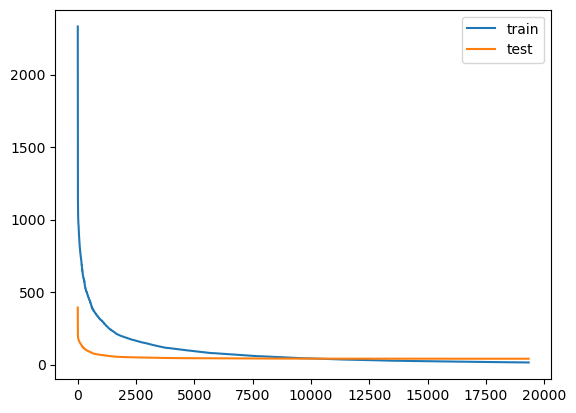

In [83]:
print(classification_report(y_train,np.argmax(gtgp.train_p,axis=1),digits=5))
print(classification_report(y_test,np.argmax(gtgp.test_p,axis=1),digits=5))
plt.plot(gtgp.train_sse)
plt.plot(gtgp.test_sse)
plt.legend(["train","test"])    

# Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
for i in range(30):
    # X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size,stratify=y, random_state=seeds[i])
    y_train,y_test,y_train_one_hot,y_test_one_hot = to_one_hot(y_train,y_test)
    clf = DecisionTreeClassifier()
    clf.fit(X_train,y_train)

    num_trees = 1
    depth = clf.tree_.max_depth
    num_nodes = clf.tree_.node_count

    train_acc = accuracy_score(y_train,clf.predict(X_train))
    test_acc = accuracy_score(y_test,clf.predict(X_test))
    train_roc = roc_auc_score(y_train_one_hot.toarray(),clf.predict_proba(X_train))
    test_roc = roc_auc_score(y_test_one_hot.toarray(),clf.predict_proba(X_test))

    with open('./benchmark_DC/'+dataset+'.csv','a') as f:
        s = str(train_acc)+","+str(test_acc)+","+str(train_roc)+","+str(test_roc)+","+str(num_trees)+","+str(depth)+","+str(num_nodes)+"\n"
        f.writelines(s)

# XGBoost

In [6]:
import xgboost

In [7]:
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size,stratify=y, random_state=seeds[i])
    
    y_train,y_test,y_train_one_hot,y_test_one_hot = to_one_hot(y_train,y_test)
    # xgb = xgboost.XGBClassifier(min_child_weight=0,max_depth=3,n_estimators=100)
    # xgb = xgboost.XGBClassifier(min_child_weight=0,max_depth=4)
    xgb = xgboost.XGBClassifier(n_estimators=2000)
    xgb.fit(X_train,y_train)

    import json

    def item_generator(json_input, lookup_key):
        if isinstance(json_input, dict):
            for k, v in json_input.items():
                if k == lookup_key:
                    yield v
                else:
                    yield from item_generator(v, lookup_key)
        elif isinstance(json_input, list):
            for item in json_input:
                yield from item_generator(item, lookup_key)

    def tree_depth(json_text):
        json_input = json.loads(json_text)
        depths = list(item_generator(json_input, 'depth'))
        return max(depths) + 1 if len(depths) != 0 else 1

    train_acc = accuracy_score(y_train,xgb.predict(X_train))
    test_acc = accuracy_score(y_test,xgb.predict(X_test))
    train_roc = roc_auc_score(y_train_one_hot.toarray(),xgb.predict_proba(X_train))
    test_roc = roc_auc_score(y_test_one_hot.toarray(),xgb.predict_proba(X_test))

    booster = xgb.get_booster()

    tree_df = booster.trees_to_dataframe()
    depths = [tree_depth(x) for x in booster.get_dump(dump_format = "json")]
    num_trees = len(depths)
    depth = np.average(depths)
    num_nodes = len(tree_df)

    with open('./benchmark_xgb/'+dataset+'.csv','a') as f:
        s = str(train_acc)+","+str(test_acc)+","+str(train_roc)+","+str(test_roc)+","+str(num_trees)+","+str(depth)+","+str(num_nodes)+"\n"
        f.writelines(s)

# GDBT

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size,stratify=y, random_state=seeds[i])
    y_train,y_test,y_train_one_hot,y_test_one_hot = to_one_hot(y_train,y_test)
    clf = GradientBoostingClassifier(n_estimators=1000)
    # clf = GradientBoostingClassifier()
    clf.fit(X_train,y_train)

    train_acc = accuracy_score(y_train,clf.predict(X_train))
    test_acc = accuracy_score(y_test,clf.predict(X_test))
    train_roc = roc_auc_score(y_train_one_hot.toarray(),clf.predict_proba(X_train))
    test_roc = roc_auc_score(y_test_one_hot.toarray(),clf.predict_proba(X_test))

    num_trees = len([ est for ests in clf.estimators_ for est in ests])
    depth = np.average([ max(1,est.tree_.max_depth) for ests in clf.estimators_ for est in ests])
    num_nodes = sum([ est.tree_.node_count for ests in clf.estimators_ for est in ests])

    with open('./benchmark_GBDT/'+dataset+'.csv','a') as f:
        s = str(train_acc)+","+str(test_acc)+","+str(train_roc)+","+str(test_roc)+","+str(num_trees)+","+str(depth)+","+str(num_nodes)+"\n"
        f.writelines(s)

# Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
for i in range(30):
    # X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size,stratify=y, random_state=seeds[i])
    y_train,y_test,y_train_one_hot,y_test_one_hot = to_one_hot(y_train,y_test)
    rfc = RandomForestClassifier()
    rfc.fit(X_train,y_train)

    train_acc = accuracy_score(y_train,rfc.predict(X_train))
    test_acc = accuracy_score(y_test,rfc.predict(X_test))
    train_roc = roc_auc_score(y_train_one_hot.toarray(),rfc.predict_proba(X_train))
    test_roc = roc_auc_score(y_test_one_hot.toarray(),rfc.predict_proba(X_test))

    num_trees = len(rfc.estimators_)
    depth = np.average([est.tree_.max_depth for est in rfc.estimators_])
    num_nodes = sum([est.tree_.node_count for est in rfc.estimators_])

    with open('./benchmark_RF/'+dataset+'.csv','a') as f:
        s = str(train_acc)+","+str(test_acc)+","+str(train_roc)+","+str(test_roc)+","+str(num_trees)+","+str(depth)+","+str(num_nodes)+"\n"
        f.writelines(s)